## Segmentacion de imagenes

In [ ]:
from matplotlib.image import imread

In [ ]:
img = imread('/content/Original-Lena-image.png')
img.shape

(439, 440, 3)

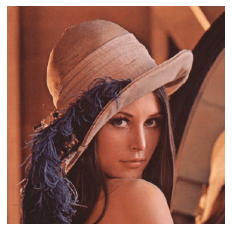

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()

Segmentamos

In [ ]:
X = img.reshape(-1,3)
X.shape

(193160, 3)

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(2)
km.fit(X)

KMeans(n_clusters=2)

In [ ]:
img_segm = km.cluster_centers_[km.labels_]

In [ ]:
img_segm = img_segm.reshape(img.shape)

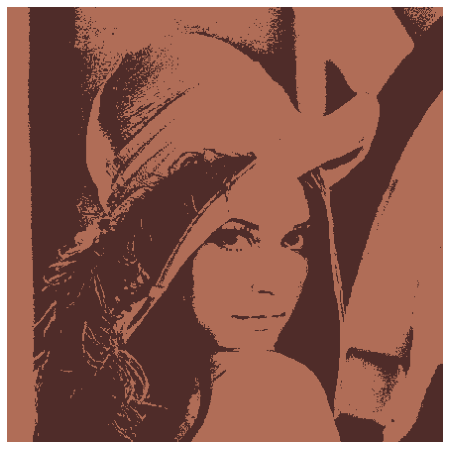

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(img_segm)
plt.axis('off')
plt.show()

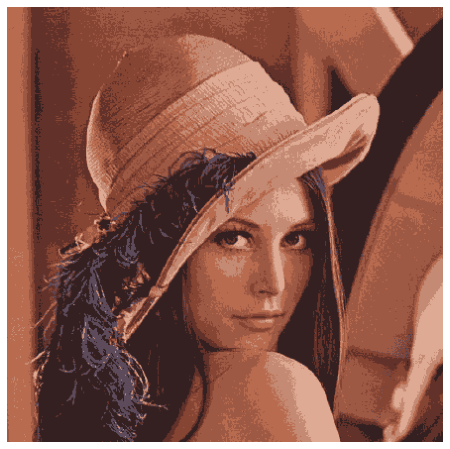

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(8)
km.fit(X)
img_segm = km.cluster_centers_[km.labels_]
img_segm = img_segm.reshape(img.shape)
plt.figure(figsize=(8,8))
plt.imshow(img_segm)
plt.axis('off')
plt.show()

## Preprocesamiento con clustering

In [ ]:
! mkdir ~/.kaggle
! cp drive/MyDrive/kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download oddrationale/mnist-in-csv

 39% 6.00M/15.2M [00:00<00:00, 62.0MB/s]
100% 15.2M/15.2M [00:00<00:00, 106MB/s] 


In [ ]:
! unzip /content/mnist-in-csv.zip

Archive:  /content/mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


In [ ]:
# Dataset 1
import pandas as pd
df = pd.read_csv('/content/mnist_train.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.values[:,1:]
Y = df.label.values

In [ ]:
# Dataset 2
from sklearn.datasets import load_digits
X, Y = load_digits(return_X_y=True)

In [ ]:
# Separamos los datos
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.7, random_state=1)

Primer modelo

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
lr.score(x_test,y_test)

0.9685185185185186

Segundo modelo

In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
  ('kmeans',KMeans(100)),
  ('log_reg',LogisticRegression())
])

In [ ]:
pipeline.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('kmeans', KMeans(n_clusters=100)),
                ('log_reg', LogisticRegression())])

In [ ]:
pipeline.score(x_test,y_test)

0.9703703703703703

Busqueda por grilla

In [ ]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter('ignore',category=ConvergenceWarning)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(95,108))
grid = GridSearchCV(pipeline,param_grid, cv=3)
grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=100)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(95, 108)})

In [ ]:
# Parametros optimos
grid.best_params_

{'kmeans__n_clusters': 98}

In [ ]:
# Score
grid.score(x_test,y_test)

0.975925925925926

## Aprendizaje semi-supervisado

Dataset

In [1]:
# Dataset 
from sklearn.datasets import load_digits
X, Y = load_digits(return_X_y=True)

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.8)

In [4]:
n_labeled = 100

Regresion Logistica

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train[:n_labeled],y_train[:n_labeled])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [6]:
lr.score(x_test,y_test)

0.8638888888888889

Clustering

In [104]:
from sklearn.cluster import KMeans
k = 60
km = KMeans(k)
km.fit(x_train)

KMeans(n_clusters=60)

In [42]:
x_cluster_space = km.transform(x_train)

In [43]:
x_cluster_space[0]

array([27.56309051, 51.35990173, 41.06767387, 46.48363036, 42.50658712,
       46.36382834, 48.98792591, 46.594975  , 36.78808668, 45.42060927,
       45.00534948, 44.29029426, 59.61456771, 46.48566983, 56.53207968,
       46.9732338 , 46.33570146, 48.07231688, 42.60319824, 51.72633114,
       41.41279067, 46.68980188, 45.56690899, 43.67938746, 43.11996289,
       52.34888451, 33.56953351, 38.3708648 , 37.89549026, 51.83945389,
       47.36487224, 43.79370569, 50.88252997, 49.69500318, 39.63066403,
       44.30441709, 37.33189468, 60.22314062, 37.92743071, 41.0843423 ,
       47.12129738, 25.43499116, 39.68463436, 53.46539506, 44.81792268,
       45.31715978, 39.64878509, 43.8350166 , 40.03588668, 50.98523146,
       57.44156451, 52.0300394 , 21.70182913, 36.68532206, 52.01216805,
       36.56097646, 36.49111035, 47.65501023, 46.9019647 , 50.24004759])

In [44]:
import numpy as np
repr_digits_idx = np.argmin(x_cluster_space, axis=0)

In [45]:
repr_digits_idx

array([1110,  925, 1407,  182,  563, 1250,  562,  616, 1024,    5, 1338,
        293,  227,  347,  200,  975,  317,  372,  245, 1152,  678,  708,
        997,  624, 1130,  959,  696, 1397,  620,  956,  805,  413, 1341,
        764, 1097,  527,  401,   51,   32,  680,  823,  791,  936,  971,
       1178,  468, 1139,  154, 1385,  555, 1092,  290,  337, 1207,  844,
        567,  592,  831,  222,  796])

In [46]:
x_digits_repr = x_train[repr_digits_idx]

In [47]:
x_digits_repr[0]

array([ 0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0., 10., 16.,
       14.,  0.,  0.,  0.,  1., 12., 16., 16., 11.,  0.,  0.,  0., 11.,
       16., 12., 16.,  8.,  0.,  0.,  0.,  6.,  4.,  7., 16.,  6.,  0.,
        0.,  0.,  0.,  0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4.,
       16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15., 11.,  0.,  0.])

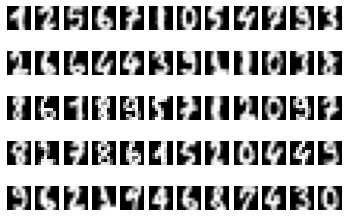

In [48]:
# Graficamos los digitos representativos
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5,12)

for i in range(5):
  for m in range(12):
    x = x_digits_repr[12*i+m]
    x = x.reshape((8,8))
    axs[i,k].axis('off')
    axs[i,k].imshow(x, cmap=plt.get_cmap('Greys_r'))
plt.show()

In [49]:
# Etiquetas de los valores representativos
y_digits_repr = y_train[repr_digits_idx]
y_digits_repr

array([1, 2, 5, 6, 7, 1, 0, 5, 4, 7, 9, 3, 2, 6, 6, 4, 4, 3, 9, 1, 1, 0,
       3, 8, 8, 6, 1, 8, 9, 5, 7, 1, 2, 0, 9, 7, 8, 2, 7, 8, 6, 1, 5, 2,
       0, 4, 4, 9, 9, 6, 2, 1, 9, 4, 6, 8, 7, 4, 3, 0])

In [122]:
lr = LogisticRegression()
lr.fit(x_digits_repr,y_digits_repr)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [123]:
lr.score(x_test, y_test)

0.8972222222222223

Generando etiquetas con clustering

In [105]:
y_train_gen = np.empty(len(x_train), dtype=np.int32)
for i in range(k):
  y_train_gen[km.labels_ == i] = y_digits_repr[i] 

In [106]:
lr = LogisticRegression()
lr.fit(x_train,y_train_gen)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [107]:
lr.score(x_test, y_test)

0.10555555555555556

Generando etiquetas con restricciones

In [108]:
close_percent = 15
X_cluster_dist = x_cluster_space[np.arange(len(x_train)), km.labels_]

In [103]:
X_cluster_dist

array([21.70182913, 19.80312079, 18.32017491, ..., 15.88284368,
       21.32816506, 27.07797697])

In [75]:
X_cluster_dist.shape

(1437,)

In [114]:
for i in range(k):
  cluster_idx = (km.labels_ == i)
  cluster_dist = X_cluster_dist[cluster_idx]
  limit_dist = np.percentile(cluster_dist,close_percent)
  above_dist = (X_cluster_dist > limit_dist)
  X_cluster_dist[cluster_idx  & above_dist] = -1

In [115]:
partial_idx = (X_cluster_dist != -1)

In [116]:
partial_idx.shape

(1437,)

In [117]:
X_cluster_dist

array([-1.        , -1.        , -1.        , ..., -1.        ,
       -1.        , 48.93470076])

In [118]:
x_train_partial = x_train[partial_idx]
y_train_partial = y_train_gen[partial_idx]

In [119]:
x_train_partial.shape

(239, 64)

In [120]:
lr.fit(x_train_partial,y_train_partial)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [121]:
lr.score(x_test,y_test)

0.15555555555555556